# Get S&P 1500 list from Wikipedia

-----------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

-----------

## Get data

In [2]:
sp500=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0] # take the first table.
sp400=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_400_companies')[0] # take the first table.
sp600=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_600_companies')[1] # take the second table.

-----------

## Merge data

In [3]:
# columns selected after eye-balling
sp500=sp500[['Symbol','CIK','Security', 'GICS Sector', 'GICS Sub-Industry']]
sp400=sp400[['Ticker symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry']]
sp600=sp600[['Ticker symbol','CIK', 'Company', 'GICS Sector', 'GICS Sub-Industry']]

In [4]:
sp500.head()

,Symbol,CIK,Security,GICS Sector,GICS Sub-Industry
0,MMM,66740,3M,Industrials,Industrial Conglomerates
1,AOS,91142,A. O. Smith,Industrials,Building Products
2,ABT,1800,Abbott,Health Care,Health Care Equipment
3,ABBV,1551152,AbbVie,Health Care,Pharmaceuticals
4,ABMD,815094,Abiomed,Health Care,Health Care Equipment


In [5]:
# dictionary to rename columns
dict_cols_rename= {'Symbol':'Ticker', 
                   'Ticker symbol':'Ticker', 
                   'Security':'Name', 
                   'Company':'Name', 
                   'GICS Sector':'Sector', 
                   'GICS Sub-Industry':'Industry'
                  }

In [6]:
# columns renamed to be merged later
sp500=sp500.rename(columns=dict_cols_rename)
sp400=sp400.rename(columns=dict_cols_rename)
sp600=sp600.rename(columns=dict_cols_rename)

In [7]:
# index columns added
sp500['sp_index']='sp500'
sp400['sp_index']='sp400'
sp600['sp_index']='sp600'

In [8]:
sp1500=pd.concat([sp500, sp400, sp600], sort=False).reset_index()
print(sp1500.shape)
sp1500

(1505, 7)


,index,Ticker,CIK,Name,Sector,Industry,sp_index
0,0,MMM,66740.0,3M,Industrials,Industrial Conglomerates,sp500
1,1,AOS,91142.0,A. O. Smith,Industrials,Building Products,sp500
2,2,ABT,1800.0,Abbott,Health Care,Health Care Equipment,sp500
3,3,ABBV,1551152.0,AbbVie,Health Care,Pharmaceuticals,sp500
4,4,ABMD,815094.0,Abiomed,Health Care,Health Care Equipment,sp500
5,5,ACN,1467373.0,Accenture,Information Technology,IT Consulting & Other Services,sp500
6,6,ATVI,718877.0,Activision Blizzard,Communication Services,Interactive Home Entertainment,sp500
7,7,ADM,7084.0,ADM,Consumer Staples,Agricultural Products,sp500
8,8,ADBE,796343.0,Adobe Inc.,Information Technology,Application Software,sp500
9,9,ADP,8670.0,ADP,Information Technology,Data Processing & Outsourced Services,sp500


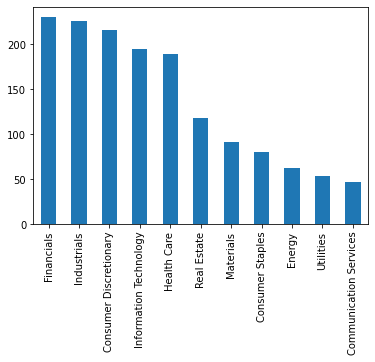

In [9]:
sp1500['Sector'].value_counts().plot(kind='bar')
plt.show()

In [10]:
grouped= sp1500[['Sector', 'sp_index']].groupby([sp1500['Sector'], sp1500['sp_index']])
    # selecting two columns
    # groupby using the two columns

grouped[['Sector']].count().unstack()
    # count obs for each group
    # show in a unstacking way

Sector            
sp_index                sp400 sp500 sp600
Sector                                   
Communication Services      8    26    13
Consumer Discretionary     62    58    95
Consumer Staples           19    33    28
Energy                     14    21    27
Financials                 62    66   102
Health Care                41    64    84
Industrials                69    71    86
Information Technology     51    76    67
Materials                  27    28    36
Real Estate                32    31    55
Utilities                  16    29     8

In [11]:
grouped= sp1500[['Industry', 'sp_index']].groupby([sp1500['Industry'], sp1500['sp_index']])
    # selecting two columns
    # groupby using the two columns

grouped[['Industry']].count().unstack().fillna(0)
    # count obs for each group
    # show in a unstacking way

Industry            
sp_index                                        sp400 sp500 sp600
Industry                                                         
Advertising                                       1.0   2.0   0.0
Aerospace & Defense                               3.0  10.0   6.0
Agricultural & Farm Machinery                     2.0   1.0   2.0
Agricultural Products                             2.0   1.0   0.0
Air Freight & Logistics                           1.0   4.0   3.0
Airlines                                          1.0   5.0   4.0
Alternative Carriers                              1.0   1.0   1.0
Aluminum                                          1.0   0.0   3.0
Apparel Retail                                    4.0   2.0  13.0
Apparel, Accessories & Luxury Goods               6.0   5.0   5.0
Application Software                              8.0  14.0   9.0
Asset Management & Custody Banks                  4.0   8.0   5.0
Auto Parts & Equipment                            6.0   2.0   8.0
Automobile Manufacturers                          0.0   3.0   1.0
Automotive Retail                                 3.0   1.0   5.0
Biotechnology                                     6.0   7.0  20.0
Brewers                                           1.0   1.0   0.0
Broadcasting                                      1.0   1.0   2.0
Building Products                                 7.0   8.0  11.0
Cable & Satellite                                 1.0   3.0   0.0
Casinos & Gaming                                  3.0   5.0   2.0
Coal & Consumable Fuels                           0.0   0.0   1.0
Commercial Printing                               0.0   0.0   2.0
Commodity Chemicals                               1.0   1.0   4.0
Communications Equipment                          3.0   5.0  12.0
Computer & Electronics Retail                     1.0   1.0   2.0
Construction & Engineering                        6.0   2.0   4.0
Construction Machinery & Heavy Trucks             3.0   3.0   6.0
Construction Materials                            1.0   2.0   0.0
Consumer Electronics                              0.0   1.0   2.0
Consumer Finance                                  4.0   4.0   7.0
Copper                                            0.0   1.0   0.0
Data Processing & Outsourced Services             6.0  11.0   4.0
Department Stores                                 2.0   0.0   0.0
Distillers & Vintners                             0.0   2.0   1.0
Distributors                                      0.0   2.0   0.0
Diversified Banks                                 0.0   6.0   3.0
Diversified Chemicals                             4.0   1.0   2.0
Diversified Metals & Mining                       1.0   0.0   3.0
Diversified REITs                                 1.0   0.0   8.0
Diversified Support Services                      4.0   3.0   6.0
Drug Retail                                       0.0   1.0   0.0
Education Services                                2.0   0.0   5.0
Electric Utilities                                5.0  13.0   1.0
Electrical Components & Equipment                 7.0   5.0   3.0
Electronic Components                             5.0   3.0   2.0
Electronic Equipment & Instruments                4.0   5.0   4.0
Electronic Manufacturing Services                 2.0   1.0   7.0
Environmental & Facilities Services               3.0   3.0   3.0
Fertilizers & Agricultural Chemicals              1.0   4.0   1.0
Financial Exchanges & Data                        0.0   9.0   1.0
Food Distributors                                 1.0   1.0   3.0
Food Retail                                       3.0   1.0   1.0
Footwear                                          3.0   0.0   2.0
Forest Products                                   1.0   0.0   1.0
Gas Utilities                                     6.0   1.0   3.0
General Merchandise Stores                        2.0   3.0   1.0
Gold                                              0.0   1.0   0.0
Health Care Distrib

In [12]:
! jupyter nbconvert SP1500.ipynb --to html

[NbConvertApp] Converting notebook SP1500.ipynb to html
[NbConvertApp] Writing 955903 bytes to SP1500.html
